## Tokenization: Encoding and Decoding


In [14]:
input_file = 'the-verdict.txt'
output_file = 'subset_sentences.txt'

# Initialize counters and storage
max_sentences = 50000
collected_sentences = []

try:
    # Open the input file and read lines
    with open(input_file, 'r') as file:
        for idx, line in enumerate(file):
            if idx < max_sentences:
                collected_sentences.append(line.strip())
            else:
                break

    # Write collected sentences to the output file
    with open(output_file, 'w') as output:
        output.write("\n".join(collected_sentences))
    print(f"{len(collected_sentences)} sentences saved to {output_file}.")
except FileNotFoundError:
    print(f"Error: {input_file} not found.")
except Exception as e:
    print(f"An error occurred: {e}")

165 sentences saved to subset_sentences.txt.


In [15]:
with open("subset_sentences.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [16]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [17]:
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [18]:
result = re.split(r'([a-z]|\s)', text)
print(result)

['H', 'e', '', 'l', '', 'l', '', 'o', ',', ' ', '', 'w', '', 'o', '', 'r', '', 'l', '', 'd', '.', ' ', 'T', 'h', '', 'i', '', 's', ',', ' ', '', 'i', '', 's', '', ' ', '', 'a', '', ' ', '', 't', '', 'e', '', 's', '', 't', '.']


In [19]:
text = "Hello, world. This is (saran!) Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', 'is', '(', 'saran', '!', ')', 'Is', 'this', '--', 'a', 'test', '?']


In [20]:
#

In [21]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))

4690


In [22]:
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [23]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130


In [24]:
vocab = {token:integer for integer,token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [25]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        #print(self.str_to_int)
        #print(self.int_to_str)
        print(preprocessed[:100])
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids]) 

        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [26]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know," 
       Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

['"', 'It', "'", 's', 'the', 'last', 'he', 'painted', ',', 'you', 'know', ',', '"', 'Mrs', '.', 'Gisburn', 'said', 'with', 'pardonable', 'pride', '.']
[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [27]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [28]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}

print(len(vocab.items()))

1132


In [29]:
all_tokens[-5:]

['younger', 'your', 'yourself', '<|endoftext|>', '<|unk|>']

In [30]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [31]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        preprocessed = [item if item in self.str_to_int
                        else "<|unk|>" for item in preprocessed]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])

        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [32]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [33]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]


In [34]:
pip install tiktoken


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.8.0


In [36]:
tokenizer = tiktoken.get_encoding("gpt2")

In [37]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [38]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [39]:
text = ("Akwirw ier")
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[33901, 86, 343, 86, 220, 959]


In [40]:
strings = tokenizer.decode(integers)
print(strings)

Akwirw ier


In [41]:
with open("subset_sentences.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [42]:
enc_sample = enc_text[50:]

In [43]:
context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [44]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [45]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [46]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    #print(type(context),type(desired))
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [47]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

The `stride` parameter in this dataset class controls how much we move forward in the tokenized text each time we create a new training example. Let’s break down why this is helpful and how to choose a good value for it.

### Why Use `stride`?

1. **Data Overlap**: Without stride, you’d create sequences by moving a full `max_length` forward every time (no overlap), which can waste potential training data. Using `stride`, however, lets you create more sequences from the same text with some overlap between consecutive input chunks. This helps because overlapping sequences can capture more context continuity, which is beneficial for models like GPT that rely on understanding the sequence flow.

2. **Preventing Data Redundancy**: Using a reasonable stride can prevent creating entirely redundant sequences. If `stride` is too small, you end up with highly similar overlapping sequences, which could lead to redundant data points, adding computational overhead without much benefit.

### Choosing an Optimal `stride` Value

The choice of `stride` depends on the trade-off between:
   - **Data diversity**: Smaller strides increase the amount of data (at the cost of similarity between samples).
   - **Computational efficiency**: Larger strides reduce overlap but may lose continuity in sequence learning.

A good starting point is often around half of `max_length`, so if `max_length` is 128, a `stride` of 64 can give you a balance. 

### Experimentation and Fine-tuning

Testing different values in small experiments will help you determine the impact on model performance and training efficiency.

In [39]:

def create_dataloader_v1(txt, batch_size=4, max_length=256,stride=128, shuffle=True, drop_last=True,num_workers=0):
    
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [40]:
with open("subset_sentences.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader)

first_batch = next(data_iter)
print(first_batch)

[tensor([[   9,  532, 8774, 7017]]), tensor([[ 532, 8774, 7017,  389]])]


In [41]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 532, 8774, 7017,  389]]), tensor([[8774, 7017,  389, 7498]])]


In [37]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=4, stride=3,
    shuffle=False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1464,  1807,  3619,   402],
        [  402,   271, 10899,  2138],
        [ 2138,   257,  7026, 15632],
        [15632,   438,  2016,   257],
        [  257,   922,  5891,  1576],
        [ 1576,   438,   568,   340],
        [  340,   373,   645,  1049]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 1807,  3619,   402,   271],
        [  271, 10899,  2138,   257],
        [  257,  7026, 15632,   438],
        [  438,  2016,   257,   922],
        [  922,  5891,  1576,   438],
        [  438,   568,   340,   373],
        [  373,   645,  1049,  5975]])


## use different stride values to know how the data overlaps

In [42]:
input_ids = torch.tensor([2, 3, 5, 1])

In [43]:
vocab_size = 6
output_dim = 3

In [44]:
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [45]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [46]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [47]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(token_embedding_layer.weight)

Parameter containing:
tensor([[-2.1338,  1.0524, -0.3885,  ...,  0.2461,  1.2119,  0.3171],
        [ 1.2277, -0.4297, -2.2121,  ..., -0.1640, -0.3348, -0.0221],
        [ 1.3382,  0.2706,  0.5071,  ...,  0.0175, -2.1517,  0.3924],
        ...,
        [-1.4889, -1.2456,  1.8034,  ..., -0.6392, -1.4939,  0.3614],
        [-1.0703,  0.2795, -0.2637,  ..., -0.2810, -1.4755, -0.1183],
        [-0.0071,  0.4982, -0.3319,  ...,  0.4970,  0.9365, -0.2091]],
       requires_grad=True)


In [48]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
   stride=2, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   9,  532, 8774, 7017],
        [8774, 7017,  389, 7498],
        [ 389, 7498,  351, 2266],
        [ 351, 2266, 3124,   13],
        [3124,   13,  198,    9],
        [ 198,    9,  532, 8774],
        [ 532, 8774, 1113, 2696],
        [1113, 2696,  389, 7498]])

Inputs shape:
 torch.Size([8, 4])


In [87]:
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[ 8009,  1276,   307,  5068],
        [  307,  5068,  2095,    13],
        [ 2095,    13,   198, 10248],
        [  198, 10248,    82,   290],
        [   82,   290,  2594, 27647],
        [ 2594, 27647,   832,   262],
        [  832,   262,   350,    13],
        [  350,    13,    46,    13]])

Inputs shape:
 torch.Size([8, 4])


In [88]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [89]:
token_embeddings

tensor([[[ 0.3812, -1.7816, -0.8996,  ...,  1.0938,  1.3187, -1.0366],
         [ 0.8789,  1.0753, -0.6633,  ...,  0.3834, -0.5829, -0.4646],
         [ 1.5617,  0.7172,  0.3588,  ...,  0.2267,  0.9792,  0.6038],
         [-1.5670, -0.3606,  0.3165,  ...,  0.2632,  1.1527, -1.1217]],

        [[ 1.5617,  0.7172,  0.3588,  ...,  0.2267,  0.9792,  0.6038],
         [-1.5670, -0.3606,  0.3165,  ...,  0.2632,  1.1527, -1.1217],
         [-0.5652,  0.3136,  1.2295,  ..., -0.1601,  1.8500,  0.3259],
         [-1.1577, -1.9382,  0.9027,  ..., -0.0718, -0.8468, -1.0623]],

        [[-0.5652,  0.3136,  1.2295,  ..., -0.1601,  1.8500,  0.3259],
         [-1.1577, -1.9382,  0.9027,  ..., -0.0718, -0.8468, -1.0623],
         [-0.1437, -0.9782,  1.5918,  ...,  0.3068, -1.1135, -0.7202],
         [-1.2510, -0.2631,  0.5004,  ..., -0.0819, -0.1356, -2.0554]],

        ...,

        [[-1.4137, -0.8726, -1.3319,  ...,  0.9114, -0.1079, -0.3058],
         [ 0.8446, -0.0041, -0.6674,  ..., -1.6732,  0.02

In [90]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [91]:
pos_embeddings

tensor([[-1.2779, -0.6466, -0.6264,  ...,  0.2854, -1.4431, -0.0659],
        [ 0.9037,  0.8810, -0.8247,  ..., -1.0396,  0.0995,  0.2920],
        [ 0.1287,  1.1402, -0.6646,  ...,  0.2128, -0.0781, -1.2559],
        [ 0.6984, -1.3709, -0.8417,  ..., -1.1398, -0.0487,  0.0037]],
       grad_fn=<EmbeddingBackward0>)

In [92]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


## Coding self attention mechanisms

In [93]:
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [94]:
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [95]:
(0.5*0.4)+(0.8*0.1)+(0.6*0.8)

0.76

In [96]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [97]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [98]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [99]:
query = inputs[1]
print(query.shape)
context_vector_2  = torch.zeros(query.shape)
print(context_vector_2,f'Shape is {context_vector_2.shape}')

for i,x_i in enumerate(inputs):
    context_vector_2+=x_i*attn_weights_2[i]

print(context_vector_2)

torch.Size([3])
tensor([0., 0., 0.]) Shape is torch.Size([3])
tensor([0.4419, 0.6515, 0.5683])


## Computing Attention Weights for all inputs tokens

In [100]:
attn_scores = torch.empty(6, 6)
print(attn_scores)
for i,xi in enumerate(inputs):
    for j,xj in enumerate(inputs):
        attn_scores[i,j] = torch.dot(xi,xj)
print(attn_scores)


tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [101]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [102]:
attn_weights = torch.softmax(attn_scores, dim=1)
print("Attention weights:")
print(attn_weights)


Attention weights:
tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [103]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


### Computing the trainable attention weights step by step

In [104]:
inputs.shape

torch.Size([6, 3])

In [105]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

print(x_2)

tensor([0.5500, 0.8700, 0.6600])


In [106]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [107]:
print(W_query)
print(W_key)
print(W_value)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


## PREVIOUS IMAGE SELF ATTENTION WITHOUT TRAINABLE PARAM'S
## 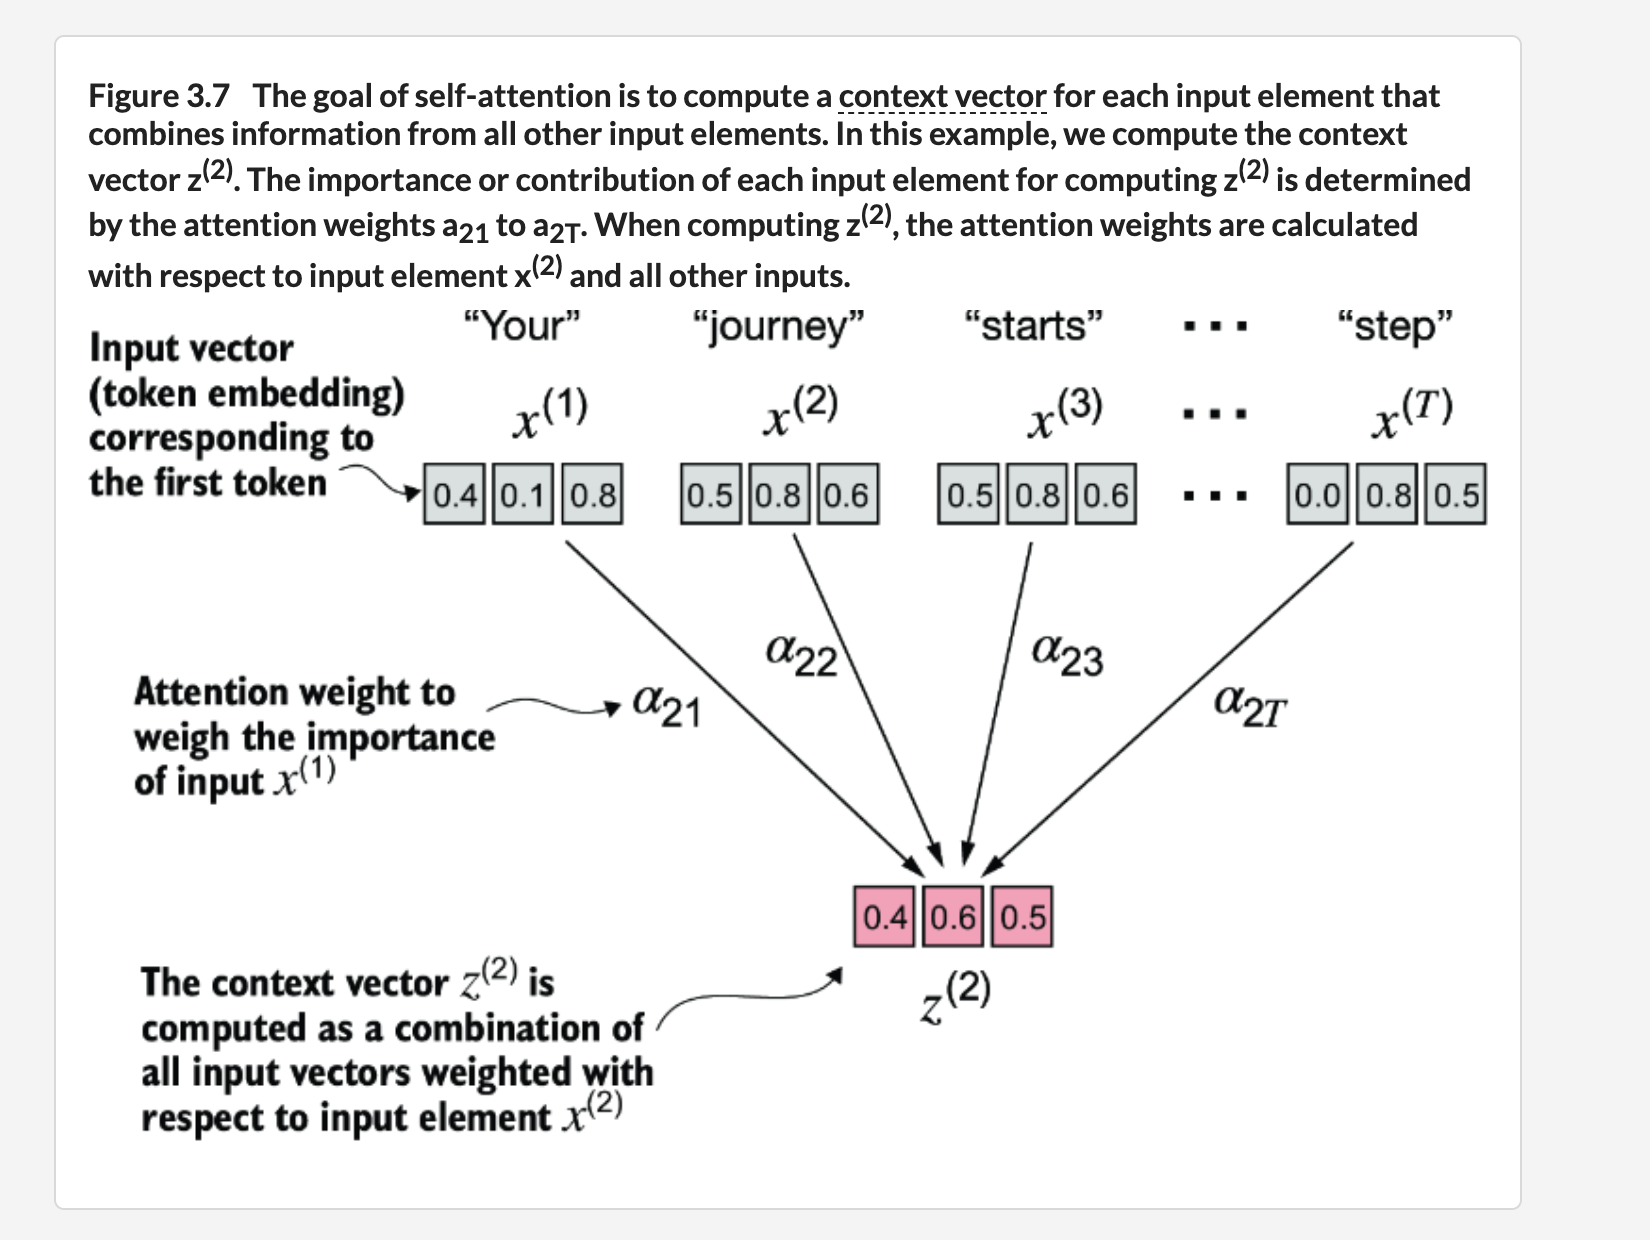

## CURRENT IMAGE WITH TRAINABLE PARAMS
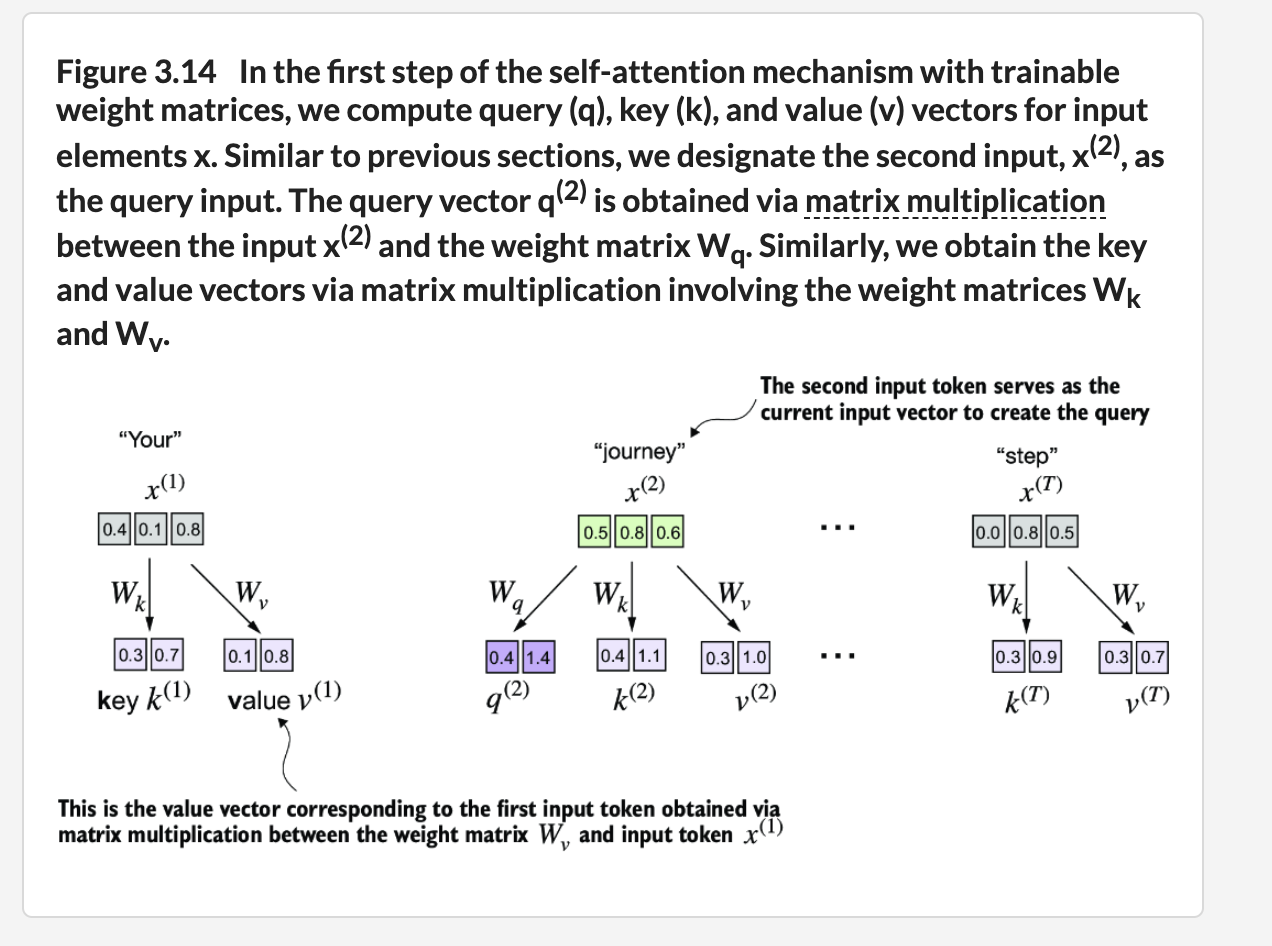

In [108]:
query_2 = x_2 @ W_query 
key_2 = x_2 @ W_key 
value_2 = x_2 @ W_value
print(query_2.shape)

print(x_2.shape)
print(W_query.shape)
print(query_2)

torch.Size([2])
torch.Size([3])
torch.Size([3, 2])
tensor([0.4306, 1.4551])


In [109]:
print(f'Inputs - {inputs},\nW_key-{W_key}')

Inputs - tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]]),
W_key-Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])


In [110]:
keys = inputs @ W_key 
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [111]:
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [112]:
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [113]:
keys.shape

torch.Size([6, 2])

In [114]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [115]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


### Implementing Self Attention Python Class

### Using nn.Parameter

In [116]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self,d_in,d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_key   = nn.Parameter(torch.rand(d_in,d_out))
        self.W_value = nn.Parameter(torch.rand(d_in,d_out))

    def forward(self,x):
        keys         = x @ self.W_key
        queries      = x @ self.W_query
        values       = x @ self.W_value
        attn_scores  = queries @ keys.T
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
        context_vec = attn_weights @ values
        return context_vec

In transformers, the scaling factor \(\sqrt{d_k}\) (where \(d_k\) is the dimension of the key vector, or `key.shape[1]`) is used to prevent large values in the dot product of the query and key vectors. Here’s why this scaling is necessary:

When we calculate attention scores by taking the dot product of the query and key vectors, the resulting values can become very large if \(d_k\) is high. This is because the dot product increases with the dimension, leading to potentially large scores that, when passed through the softmax function, could result in extremely peaked distributions. Such peaked distributions may cause the model to overemphasize specific values, making learning harder and gradients more unstable.

To address this, dividing by \(\sqrt{d_k}\) normalizes these scores, keeping them at a scale that softmax can handle effectively. This scaling ensures the values are more balanced and helps stabilize the gradient during training, leading to better convergence and performance in transformer models.

In [117]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In transformers, the scaling factor \(\sqrt{d_k}\) (where \(d_k\) is the dimension of the key vector, or `key.shape[1]`) is used to prevent large values in the dot product of the query and key vectors. Here’s why this scaling is necessary:

When we calculate attention scores by taking the dot product of the query and key vectors, the resulting values can become very large if \(d_k\) is high. This is because the dot product increases with the dimension, leading to potentially large scores that, when passed through the softmax function, could result in extremely peaked distributions. Such peaked distributions may cause the model to overemphasize specific values, making learning harder and gradients more unstable.

To address this, dividing by \(\sqrt{d_k}\) normalizes these scores, keeping them at a scale that softmax can handle effectively. This scaling ensures the values are more balanced and helps stabilize the gradient during training, leading to better convergence and performance in transformer models.

### Using nn.Linear

In [118]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        context_vec = attn_weights @ values
        return context_vec

    def transfer_wegiths(self,v1):
        with torch.no_grad():
            v1.W_query.copy_(self.W_query.weight.T)
            v1.W_key.copy_(self.W_key.weight.T)
            v1.W_value.copy_(self.W_value.weight.T)


In [119]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [120]:

sa_v2.transfer_wegiths(sa_v1)

In [121]:
output_v1 = sa_v1(inputs)
output_v2 = sa_v2(inputs)

# Compare the outputs
print("Output of SelfAttention_v1 (after weight transfer):")
print(output_v1)

print("\nOutput of SelfAttention_v2:")
print(output_v2)

Output of SelfAttention_v1 (after weight transfer):
tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)

Output of SelfAttention_v2:
tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


## Hiding Future words with causal attention 

In [122]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [123]:
W_query = sa_v2.W_query.weight.T

In [124]:
inputs @ W_query 

tensor([[ 0.6600, -0.2047],
        [ 0.9091, -0.4471],
        [ 0.8960, -0.4419],
        [ 0.5034, -0.2633],
        [ 0.4088, -0.2232],
        [ 0.6628, -0.3292]], grad_fn=<MmBackward0>)

In [125]:
sa_v2.W_query(inputs)

tensor([[ 0.6600, -0.2047],
        [ 0.9091, -0.4471],
        [ 0.8960, -0.4419],
        [ 0.5034, -0.2633],
        [ 0.4088, -0.2232],
        [ 0.6628, -0.3292]], grad_fn=<MmBackward0>)

In [126]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs) 
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [127]:
attn_scores.shape

torch.Size([6, 6])

In [128]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [129]:
torch.tril(torch.ones(4,4))

tensor([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]])

In [130]:
masked_sample = attn_weights * mask_simple
print(masked_sample)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [131]:
masked_sum = masked_sample.sum(dim=-1,keepdim=True)
print(masked_sum)
masked_sample_norm = masked_sample/masked_sum
print(masked_sample_norm)

tensor([[0.1921],
        [0.3700],
        [0.5357],
        [0.6775],
        [0.8415],
        [1.0000]], grad_fn=<SumBackward1>)
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


## Efficient Masking Trick - by creating mask with inf for above diagonal elements


In [132]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
print(mask)
print(f'attention scores{attn_scores}')
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
attention scorestensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)
tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=

In [133]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


## 3.5.2 Masking additional attention weights with dropout
In the transformer architecture, including models like GPT, dropout in the attention mechanism is typically applied 
#### 'at two specific times: after calculating the attention weights or after applying the attention weights to the value vectors.'
#### 'Here we will apply the dropout mask after computing the attention weights,' as illustrated in figure 3.22, because it’s the more common variant in practice.

In [134]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6, 6)
print(dropout(example))


tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [135]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


## 3.5.3 Implementing a compact causal attention class

In [136]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [137]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [138]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [139]:
print(batch[0],"shape=",batch[0].shape)
print(keys.transpose(-1,-2),'shape=',keys.transpose(-1,-2).shape)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]]) shape= torch.Size([6, 3])
tensor([[ 0.3147, -0.0298, -0.0170, -0.1054,  0.2185, -0.2258],
        [-0.4016, -0.4459, -0.4262, -0.2724,  0.0482, -0.4782]],
       grad_fn=<TransposeBackward0>) shape= torch.Size([2, 6])


In [140]:
class CasualAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
           'mask',torch.triu(torch.ones(context_length,context_length),diagonal=1) 
        )

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.transpose(1,2)
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        context_vec = attn_weights @ values
        return context_vec

 


### Use of register_buffer
While all added code lines should be familiar at this point, we now added a self .register_buffer() call in the __init__ method. The use of register_buffer in PyTorch is not strictly necessary for all use cases but offers several advantages here. For instance, when we use the CausalAttention class in our LLM, buffers are automatically moved to the appropriate device (CPU or GPU) along with our model, which will be relevant when training our LLM. This means we don’t need to manually ensure these tensors are on the same device as your model parameters, avoiding device mismatch errors.

In [141]:
torch.manual_seed(2)
context_length = inputs.shape[1]
casual_attn = CasualAttention(d_in,d_out,context_length,0.5)
print('Causal mask buffer:')
print(casual_attn.mask)
context_vector = casual_attn(batch)

Causal mask buffer:
tensor([[0., 1., 1.],
        [0., 0., 1.],
        [0., 0., 0.]])


In [142]:
print(f'context vector :{context_vector} and shape :{context_vector.shape}')

context vector :tensor([[[0.2400, 0.0640],
         [0.2428, 0.0642],
         [0.2427, 0.0642],
         [0.2425, 0.0651],
         [0.2404, 0.0651],
         [0.2435, 0.0648]],

        [[0.2400, 0.0640],
         [0.2428, 0.0642],
         [0.2427, 0.0642],
         [0.2425, 0.0651],
         [0.2404, 0.0651],
         [0.2435, 0.0648]]], grad_fn=<UnsafeViewBackward0>) and shape :torch.Size([2, 6, 2])


# 3.6 Extending single-head attention to multi-head attention
In practical terms, implementing multi-head attention involves creating multiple instances of the self-attention mechanism (see figure 3.18), each with its own weights, and then combining their outputs. Using multiple instances of the self-attention mechanism can be computationally intensive, but it’s crucial for the kind of complex pattern recognition that models like transformer-based LLMs are known for.

### A wrapper class to implement multi-head attention

In [143]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length,
                 dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CasualAttention(
                 d_in, d_out, context_length, dropout, qkv_bias
             ) 
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [144]:
batch.shape

torch.Size([2, 6, 3])

In [145]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)
context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


In [146]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(
    d_in, 1, context_length, 0.0, num_heads=2
)
context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.6432, -0.1042],
         [-0.6430, -0.1054],
         [-0.6430, -0.1054],
         [-0.6423, -0.1061],
         [-0.6426, -0.1049],
         [-0.6424, -0.1065]],

        [[-0.6432, -0.1042],
         [-0.6430, -0.1054],
         [-0.6430, -0.1054],
         [-0.6423, -0.1061],
         [-0.6426, -0.1049],
         [-0.6424, -0.1065]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


Up to this point, we have implemented a MultiHeadAttentionWrapper that combined multiple single-head attention modules. However, these are processed sequentially via [head(x) for head in self.heads] in the forward method. We can improve this implementation by processing the heads in parallel. One way to achieve this is by computing the outputs for all attention heads simultaneously via matrix multiplication.

### Listing 3.5 An efficient multi-head attention class

In [147]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, 
                 context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)  
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)                                                                   

        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        attn_scores = queries @ keys.transpose(2, 3)
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        attn_scores.masked_fill_(mask_bool, -torch.inf)
        #print(attn_scores)

        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values).transpose(1, 2)

        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        print(context )
        context_vec = self.out_proj(context_vec)
        return context_vec



## INformation about torch function contiguous and view
The `contiguous()` function in PyTorch is used to ensure that a tensor's data is stored in a contiguous block of memory. When you apply certain operations, such as `transpose()` or `view()`, PyTorch may create a non-contiguous tensor, meaning the elements in memory are not stored sequentially in the same way they would appear if you iterated through the tensor in a straightforward order.

Here’s a breakdown of why `contiguous()` is necessary:

1. **Memory Layout**: Many tensor operations create "views" or "transpositions" of the original tensor. These views might not store the tensor data contiguously in memory, meaning the data might be scattered or in a format that does not align sequentially.

2. **Compatibility with `view()`**: In this code, `view()` is used to reshape `context_vec` into a new shape `(b, num_tokens, self.d_out)`. However, `view()` requires the tensor to be contiguous in memory because it maps the underlying data directly to the new shape without copying it. Non-contiguous data would cause `view()` to raise an error.

3. **Performance**: Working with contiguous tensors can be more efficient for certain operations in terms of both memory access and speed, as contiguous memory is easier for the processor to handle.

So, `contiguous()` is used here to ensure that `context_vec` is stored in contiguous memory before reshaping it with `view()`.

# Explanation about out_proj
In a multi-headed transformer, like those used in Transformer models for NLP, the `out_proj` layer (often called an "output projection") plays a crucial role in consolidating information from multiple attention heads. Here’s a breakdown of how it works and why it’s necessary, using an example with words:

### Multi-Head Attention Recap

In a Transformer, multi-head attention allows the model to focus on different aspects of the input sequence simultaneously. For example, if the sentence is:

> "The cat sat on the mat, and it was very comfortable."

Each attention "head" might focus on different relationships within this sentence:
- One head might focus on the relationship between "cat" and "sat."
- Another head might connect "cat" and "it" to understand "it" refers to the cat.
- A third head might associate "comfortable" with "mat."

Each of these heads generates its own set of attention weights and resulting feature vectors. When these vectors are combined, we get a richer representation of each word that captures multiple perspectives or relationships.

### Why `out_proj` is Needed

After the multi-head attention mechanism, we end up with multiple sets of feature vectors—one from each attention head. To continue working with a single vector per token, we need to combine or project these vectors back into the original space of dimensions. This is where `out_proj` comes in:

1. **Concatenation**: First, the output of each head is concatenated, forming a larger vector that combines insights from each head.
   
2. **Linear Transformation with `out_proj`**: This concatenated vector is then passed through the `out_proj` layer, which is a `nn.Linear` layer in PyTorch, to project it back down to the model’s original dimensionality. This step accomplishes two things:
   - **Dimensionality Reduction**: Reduces the dimensionality back to `d_out`, the model’s working dimension size.
   - **Feature Mixing**: Learns a way to blend or weigh the contributions of each head differently, making the output richer than if we simply took an average or fixed transformation.

### Example with Words

Imagine if `d_out = 64` and you have 8 heads, each generating a 64-dimensional vector for each token. After the multi-head attention step, you get an intermediate vector of size \(8 \times 64 = 512\) dimensions for each word in the sentence.

Using `out_proj`, we can then project this 512-dimensional vector back down to 64 dimensions. This final 64-dimensional vector is a mixture of the insights gained from all 8 heads. For instance, the word "cat" might end up with a vector that reflects both:
   - its role as a subject (learned from one head)
   - its relationship with "it" (from another head)
   - and its connection to "sat" (from a third head).

### Why This Matters

The `out_proj` layer ensures that after multi-head attention, we have a single, meaningful vector per token, enriched by multi-head insights, without increasing the overall dimensionality. This way, the transformer can continue processing the sentence with contextually richer embeddings that are still manageable in size.

In short, `out_proj` consolidates the multiple perspectives from each head into a cohesive, final representation of each word, ready for subsequent layers in the transformer.

In [148]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [149]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

[14253, 1080, 318, 5626]
tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [150]:
d_in

3

In [151]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)  
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        attn_scores = queries @ keys.transpose(2, 3)
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values).transpose(1, 2)
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)
        return context_vec



In [152]:
# Setting up parameters to match GPT-2 small configuration
torch.manual_seed(123)
batch_size = 3       # Example batch size
context_length = 1024  # GPT-2 context length
d_in = 768             # GPT-2 input dimension
d_out = 768            # GPT-2 output dimension
num_heads = 12         # GPT-2 attention heads
dropout = 0.1          # Example dropout

# Random input tensor matching the required shape
batch = torch.rand(batch_size, context_length, d_in)

# Initialize MultiHeadAttention with GPT-2 small model's configuration
mha = MultiHeadAttention(d_in, d_out, context_length, dropout, num_heads)
context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)


tensor([[[-0.1287, -0.1310, -0.0450,  ...,  0.2526, -0.3858, -0.0014],
         [-0.1409, -0.2545, -0.0893,  ...,  0.2924, -0.3250, -0.1357],
         [-0.1364, -0.2712, -0.1424,  ...,  0.1969, -0.3298, -0.1497],
         ...,
         [-0.0905, -0.2327, -0.0859,  ...,  0.2516, -0.2953, -0.2071],
         [-0.0957, -0.2354, -0.0867,  ...,  0.2516, -0.2989, -0.2050],
         [-0.0914, -0.2343, -0.0850,  ...,  0.2496, -0.2916, -0.2029]],

        [[-0.0815, -0.3608, -0.1158,  ...,  0.3110, -0.5993, -0.3765],
         [-0.0138, -0.2713, -0.1052,  ...,  0.2712, -0.3796, -0.2868],
         [-0.0188, -0.2255, -0.0641,  ...,  0.3101, -0.3842, -0.2540],
         ...,
         [-0.0972, -0.2341, -0.0889,  ...,  0.2461, -0.2903, -0.2047],
         [-0.0961, -0.2317, -0.0868,  ...,  0.2528, -0.2937, -0.2041],
         [-0.0947, -0.2327, -0.0867,  ...,  0.2510, -0.2933, -0.2059]],

        [[-0.1755, -0.2321, -0.2647,  ...,  0.2404, -0.2146, -0.0859],
         [-0.1648, -0.1709, -0.2975,  ...,  0

In [153]:
batch_size

3

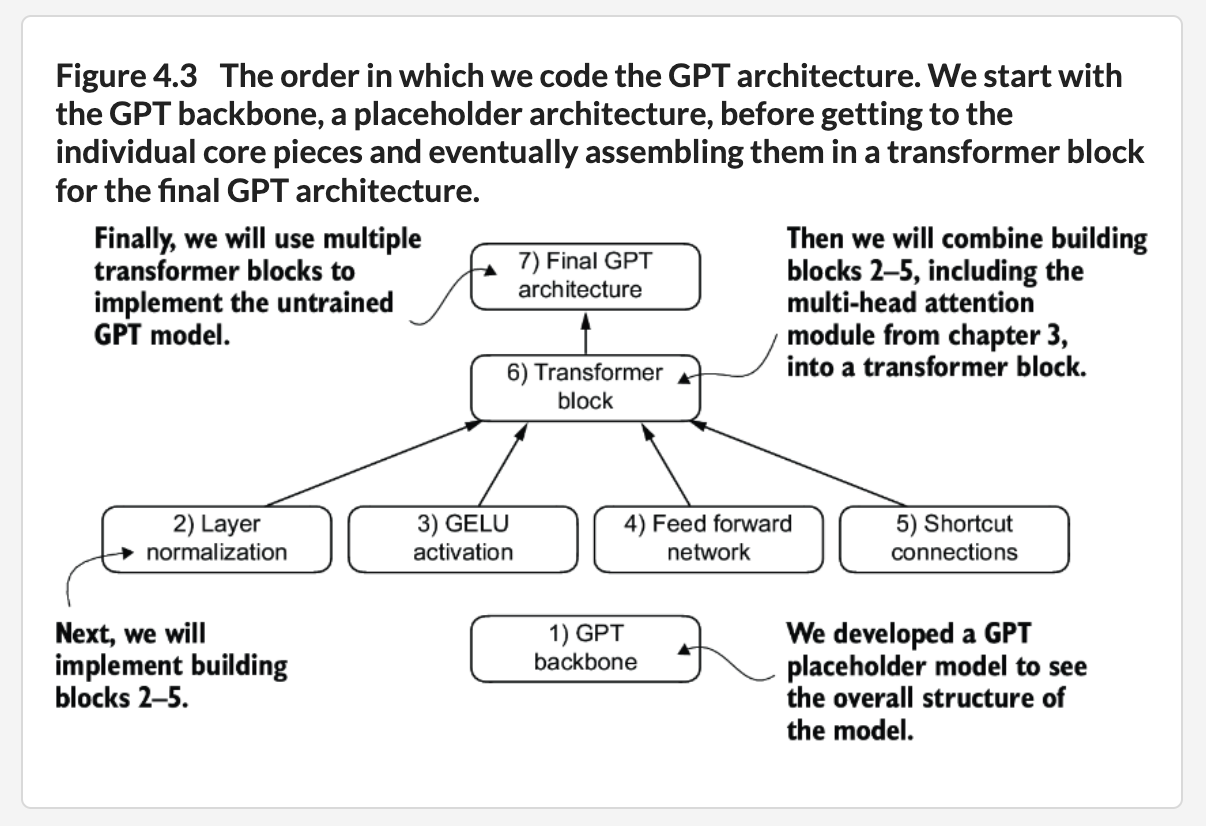

The numbered boxes in figure 4.3 illustrate the order in which we tackle the individual concepts required to code the final GPT architecture. We will start with step 1, a placeholder GPT backbone we will call

### 4.1 A placeholder GPT model architecture class

In [154]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg)
              for _ in range(cfg["n_layers"])]
        )
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        print(seq_len)
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device)
        )
        x = tok_embeds + pos_embeds
        #print("after toekn and pos embedding",x)
        #print("shape",x.shape)
        x = self.drop_emb(x)
        #print("after dropouts",x)
        #print("shape",x.shape)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        #print("after normalization and appliying transformer blocks",x)
        #print("shape",x.shape)
        logits = self.out_head(x)
        #print("logits")
        #print("shape",x.shape)
        return logits

class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()

    def forward(self, x):
        return x

class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()

    def forward(self, x):
        return x

In [155]:
class DummyGPTModel_saran(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg['vocab_size'],cfg['emb_dim'])
        self.pos_emb = nn.Embedding(cfg['context_length'],cfg['emb_dim'])
        self.drop_emb = nn.Dropout(cfg['drop_rate'])
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg['n_layers'])]
        )
        self.final_layer_norm = DummyLayerNorm(cfg['emb_dim'])
        self.out_head = nn.Linear(cfg['emb_dim'],cfg['vocab_size'],bias=False)

    def forward(self,in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len,device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_layer_norm(x)
        logits = self.out_head(x)
        return logits

class DummyTransformerBlock(nn.Module):
    def __init__(self,cfg):
        super().__init__()

    def forward(self, x):
        return x

class DummyLayerNorm(nn.Module):
    def __init__(self,normalized_shape,eps=1e-5):
        super().__init__()

    def forward(self,x):
        return x
        
        
        

## About Embedding dim - 
The **embedding dimension** refers to the number of dimensions used to represent each token (e.g., word, subword, or character) in a vector space. It’s essentially the size of the vector that represents each token in the embedding layer of a neural network.

Here’s a bit more detail:

1. **Representation of Each Token**: In NLP, each word (or token) needs to be represented as a numerical vector so it can be processed by a model. The embedding dimension is the number of values in this vector. For example, if the embedding dimension is 128, each token will be represented by a 128-dimensional vector.

3. **Dimensionality Choice**: This embedding dimension is a design choice that influences both the model’s capacity to capture information and its computational requirements. Common embedding dimensions are 128, 256, or 512, though larger models (like BERT or GPT) may use dimensions as high as 768 or 1024.

4. **Learned Representations**: The values in these vectors are learned during training, meaning the model learns how to position words (or tokens) in this space such that similar or contextually related tokens are closer together. For instance, “cat” and “dog” might have similar vectors in a well-trained embedding space.

5. **In Transformers**: In transformer models, the embedding dimension (often referred to as `d_model`) is crucial, as it defines the size of the vectors used throughout the model for attention, multi-head processing, and more. So, if `d_model = 512`, each token is represented by a 512-dimensional vector, and this dimensionality remains consistent across the layers in the transformer.

In summary, the embedding dimension is simply the size of the vector that represents each token in the embedding space. It defines how much information each token's vector can hold and affects how relationships between tokens can be captured in this space.

## Why we pass embedding dim as input to norm layer  - 
In transformers, **Layer Normalization** is applied to stabilize and regularize the training process by normalizing the input across its **embedding dimension**. Here’s why we use the embedding dimension as the normalization axis in layer normalization:

1. **Normalization Across Features**: The embedding dimension represents all the features of each token, so normalizing across this dimension ensures that each token’s features (or vector components) are centered around a mean of 0 and have a standard deviation of 1. This prevents large variations in feature scale that could destabilize training or make it hard for the model to converge.

2. **Token-wise Normalization**: Layer Normalization is performed on each token independently. It treats each token as a single "instance" and normalizes across its feature vector (i.e., the embedding dimension) rather than across the batch. This is particularly useful for transformers, as each token attends to other tokens in the sequence, and normalizing each token independently helps maintain this attention mechanism’s stability.

3. **Preventing Internal Covariate Shift**: By normalizing across the embedding dimension, Layer Normalization helps reduce "internal covariate shift," which is when the distribution of layer inputs changes as parameters are updated during training. By normalizing each token’s features, the network can learn more stably, as each token’s feature distribution remains more consistent across layers.

4. **Learnable Parameters for Flexibility**: Layer normalization in PyTorch (or other libraries) often includes learnable parameters, `gamma` (scaling) and `beta` (bias), for each feature dimension. This allows the model to learn which features should retain higher or lower importance after normalization, maintaining flexibility within each token’s feature representation.

In essence, using the embedding dimension for layer normalization helps each token representation remain numerically stable and meaningful throughout the network, making it easier for the model to learn complex relationships across layers.




In [156]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "emb_dim": 768,          # Embedding dimension
    "n_heads": 12,           # Number of attention heads
    "n_layers": 12,          # Number of layers
    "drop_rate": 0.1,        # Dropout rate
    "qkv_bias": False        # Query-Key-Value bias
}

In [157]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
print(batch)
batch = torch.stack(batch, dim=0)
print(batch)

[tensor([6109, 3626, 6100,  345]), tensor([6109, 1110, 6622,  257])]
tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [158]:
torch.manual_seed(123)
model = DummyGPTModel_saran(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6755, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


In [159]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

4
Output shape: torch.Size([2, 4, 50257])
tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6755, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


In [160]:
predicted_token_ids = logits.argmax(dim=-1)
print("Predicted token IDs:", predicted_token_ids)

# Convert token IDs to words
decoded_texts = [tokenizer.decode(ids.tolist()) for ids in predicted_token_ids]
print("Decoded texts:", decoded_texts)

Predicted token IDs: tensor([[19468, 41068, 49677, 47907],
        [44981, 47401, 47117, 22644]])
Decoded texts: [' granseq UNIVERS Trident', ' slurs apologizingRelations directive']


## Batch Normalization 

In [161]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5)
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [162]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [163]:
out

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)

In [164]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[2.9802e-08],
        [3.9736e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.],
        [1.]], grad_fn=<VarBackward0>)


In [165]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.],
        [1.]], grad_fn=<VarBackward0>)


## A layer normalization class

By learning different scale (𝛾) and shift (β) values, the network gains the flexibility to adapt the distribution of activations dynamically across different layers, making training more stable and allowing the model to better fit the data.

1. Stabilizing Representations Across Layers
LLMs process text through many layers, where each layer refines the representation of words or tokens. As information flows through these layers, normalization helps to:

Control Activation Scale: Without layer normalization, activations can grow or shrink significantly across layers, especially in deep networks with millions of parameters. This can destabilize learning and lead to exploding or vanishing gradients.
Ensure Consistency: In each layer, normalizing token representations to a similar distribution ensures that each layer operates on a stable and consistent scale, which is especially important given the variable and context-sensitive nature of language.
By normalizing each token’s representation in a common distribution with mean 0 and variance 1, layer normalization gives each layer a stable starting point. This allows each layer to focus on learning meaningful transformations rather than dealing with shifting scales in token activations.

2. Adaptability with Shift and Scale in LLMs
In LLMs, every token or subword is contextually embedded. The learned shift (β) and scale (γ) parameters enable each layer to adjust its output distribution, making the model more adaptable and capable of capturing nuanced language patterns. Here’s how:

Task-Specific Adjustments: In LLMs, the context and meaning of words can vary dramatically. The scale and shift parameters help the model learn the appropriate distribution for representations based on the current context.
For example, if a word needs to be emphasized or if a sentence structure requires a particular feature to be more prominent, the model can learn to adjust the scale of that feature accordingly.
Fine-Tuning for New Domains: When an LLM is fine-tuned on a specific task or domain (e.g., medical text), the scale and shift parameters in each layer adapt to accommodate new patterns and distributions that might not be present in the pre-training corpus. This ability to adjust distributions per feature gives the model flexibility to learn specific nuances of the task or language domain.
3. Improving Gradient Flow in LLMs
LLMs are typically trained with backpropagation through large numbers of parameters and multiple layers. Normalization with learned scale and shift parameters supports efficient gradient flow by:

Reducing Covariate Shift: As gradients backpropagate through layers, normalized activations with adaptable scale and shift minimize fluctuations, allowing gradients to flow smoothly. This is crucial in LLMs where even small instabilities can lead to training divergence.
Supporting Diverse Language Structures: Language data is highly variable—words have different meanings based on context, grammar, and syntax. By normalizing activations and learning appropriate scale and shift parameters, each layer can capture the necessary diversity of representations in a structured way, which helps the gradients learn more efficiently.

## more precise 
Why Shift and Scale are Important in LLMs
LLMs, especially transformer-based models, handle complex sequences of data with millions or billions of parameters. This complexity means that the input representations and intermediate activations can vary dramatically, potentially causing issues with training stability, gradient flow, and convergence. Layer normalization addresses these issues by:

**Stabilizing Training** : Normalizing activations helps control the scale of intermediate representations. In LLMs, where inputs vary widely in length, content, and structure, this stabilization is crucial for avoiding unstable gradients and helping with efficient training.

**Improving Generalization:** The model can learn representations that are more robust to variations in input data, which is essential for generalizing to a wide variety of language patterns.

Adapting Representations with Scale and Shift: The scale (
𝛾
γ) and shift (
𝛽
β) parameters enable the model to learn to "denormalize" specific features when needed. After normalizing activations, the model can adjust each feature’s magnitude and position (mean), allowing it to learn task-specific or contextual representations.

How Scale and Shift Help in LLMs: A Step-by-Step Example
Consider a few layers of an LLM processing a sentence. Each layer receives an input tensor that represents embeddings of tokens. As each token embedding flows through the network:

Token Embedding and Normalization: For each token in the sequence, its embedding values may vary widely. Layer normalization ensures that each token embedding within a layer has a mean of 0 and variance of 1.

Task-Specific Adjustments: The model learns distinct values of 
𝛾
γ and 
𝛽
β for each layer, meaning it can adapt each layer’s activation distribution independently. For example:

Scale 
𝛾
γ can control the spread of token representations, allowing certain layers to have a wider or narrower range of activations.
Shift 
𝛽
β enables the model to adapt the mean of activations, making some token embeddings more positive or negative, depending on the task.
Contextual Representation: In transformers, attention layers compute context-dependent representations by comparing relationships among tokens. Layer normalization with learned shift and scale allows each layer to adjust representations so that token relationships (like semantic similarity or syntactic structure) are more accurately represented.

Practical Example in Language Modeling
Suppose the LLM is processing the sentence:

"The cat sat on the mat."

After each layer, the embeddings for words like "cat" and "mat" are normalized, meaning they start with a mean of 0 and variance of 1. However, to improve language modeling, the model might learn that "cat" and "mat" need:

Higher variance (scale) to capture different semantic relationships (like when "cat" has broader connections with related words like "animal").
A shift in mean (shift) so that "cat" and "mat" embeddings align closer to certain syntactic structures, enabling better grammar and meaning capture.
So, 
𝛾
γ and 
𝛽
β allow the LLM to fine-tune its understanding of word relationships while stabilizing gradients. This combination of stability and flexibility from layer normalization with scale and shift is key to training large and accurate language models.

In [166]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        #print(f"normalized tenspr:{norm_x}")
        #print(f"mean of the nomralized tensor:{norm_x.mean(dim=-1, keepdim=True)}")
        #print(f"var of the nomralized tensor:{norm_x.var(dim=-1,unbiased=False, keepdim=True)}")
        return self.scale * norm_x + self.shift

### Biased variance
In our variance calculation method, we use an implementation detail by setting unbiased=False. For those curious about what this means, in the variance calculation, we divide by the number of inputs n in the variance formula. This approach does not apply Bessel’s correction, which typically uses n – 1 instead of n in the denominator to adjust for bias in sample variance estimation. This decision results in a so-called biased estimate of the variance. For LLMs, where the embedding dimension n is significantly large, the difference between using n and n – 1 is practically negligible. I chose this approach to ensure compatibility with the GPT-2 model’s normalization layers and because it reflects TensorFlow’s default behavior, which was used to implement the original GPT-2 model. 

In [167]:
batch_example

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])

In [168]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


##  4.2 Implementing a feed forward network with GELU activations
### Listing 4.3 An implementation of the GELU activation function

In [169]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) * 
            (x + 0.044715 * torch.pow(x, 3))
        ))

####  The GELU activation function can be implemented in several ways; the exact version is defined as GELU(x) = x𝛷(x), where 𝛷(x) is the cumulative distribution function of the standard Gaussian distribution. In practice, however, it’s common to implement a computationally cheaper approximation (the original GPT-2 model was also trained with this approximation.

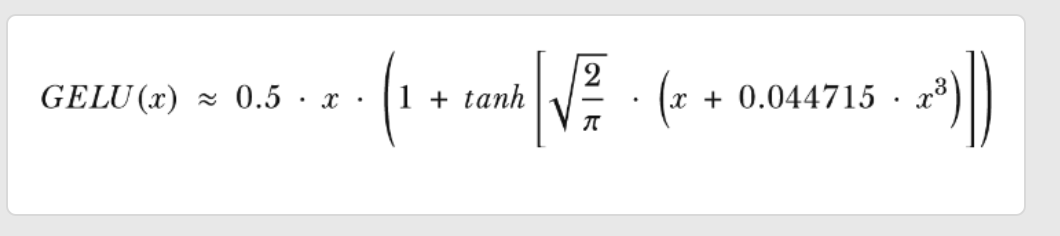

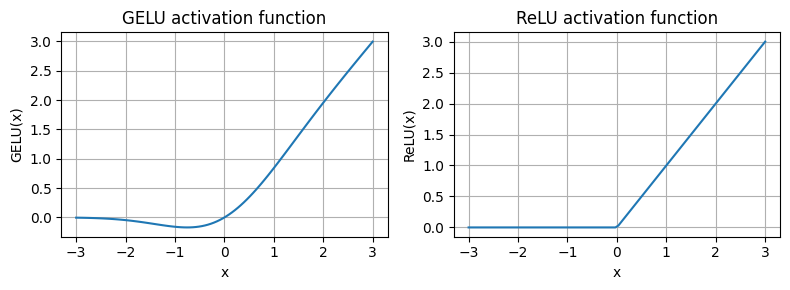

In [170]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [171]:
## Small Neural Network with GELU 
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)

In [172]:
GPT_CONFIG_124M

{'vocab_size': 50257,
 'context_length': 1024,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'qkv_bias': False}

In [173]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)
out

torch.Size([2, 3, 768])


tensor([[[ 0.1238,  0.0457,  0.0939,  ...,  0.1107,  0.0167, -0.1992],
         [ 0.1574, -0.0282,  0.0049,  ...,  0.0026,  0.1120, -0.1075],
         [ 0.1184, -0.0052,  0.0839,  ...,  0.1662,  0.0112, -0.1685]],

        [[ 0.1302,  0.0630,  0.1050,  ...,  0.1439,  0.0562, -0.1128],
         [ 0.1249, -0.0073,  0.1022,  ...,  0.0417,  0.0381, -0.0828],
         [ 0.0494,  0.0654,  0.0347,  ...,  0.0701,  0.0793, -0.1810]]],
       grad_fn=<ViewBackward0>)

In [174]:
##  A neural network to illustrate shortcut connections
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), 
                          GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), 
                          GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), 
                          GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), 
                          GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), 
                          GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            #print(f"Layer:{layer}")
            layer_output = layer(x)
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x

In [175]:
layer_sizes = [3, 3, 3, 3, 3, 1]  
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False
)
model_without_shortcut

ExampleDeepNeuralNetwork(
  (layers): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=3, out_features=3, bias=True)
      (1): GELU()
    )
    (1): Sequential(
      (0): Linear(in_features=3, out_features=3, bias=True)
      (1): GELU()
    )
    (2): Sequential(
      (0): Linear(in_features=3, out_features=3, bias=True)
      (1): GELU()
    )
    (3): Sequential(
      (0): Linear(in_features=3, out_features=3, bias=True)
      (1): GELU()
    )
    (4): Sequential(
      (0): Linear(in_features=3, out_features=1, bias=True)
      (1): GELU()
    )
  )
)

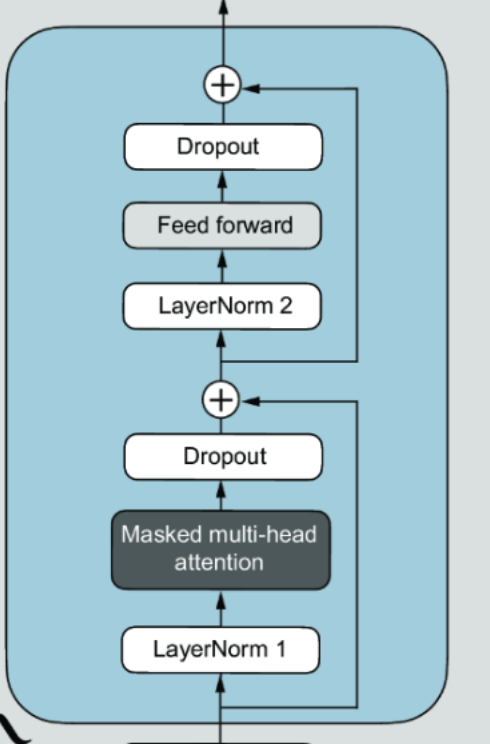

In [176]:
output = model_without_shortcut(sample_input)
output

tensor([[0.0610]], grad_fn=<MulBackward0>)

In [177]:
def print_gradients(model, x):
    output = model(x)
    target = torch.tensor([[0.]])

    loss = nn.MSELoss()
    loss = loss(output, target)
    print(f"LOSS:{loss}")

    loss.backward()
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")
print_gradients(model_without_shortcut,sample_input )

LOSS:0.003721896791830659
layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.0001201116101583466
layers.2.0.weight has gradient mean of 0.0007152041653171182
layers.3.0.weight has gradient mean of 0.001398873864673078
layers.4.0.weight has gradient mean of 0.005049646366387606


#### The output of the print_gradients function shows, the gradients become smaller as we progress from the last layer (layers.4) to the first layer (layers.0), which is a phenomenon called the vanishing gradient problem.

In [178]:
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True
)

print_gradients(model_with_shortcut,sample_input )

LOSS:0.0007222637650556862
layers.0.0.weight has gradient mean of 0.0014432319439947605
layers.1.0.weight has gradient mean of 0.004846963100135326
layers.2.0.weight has gradient mean of 0.004138902295380831
layers.3.0.weight has gradient mean of 0.00591512955725193
layers.4.0.weight has gradient mean of 0.03265950828790665


### The idea is that the self-attention mechanism in the multi-head attention block identifies and analyzes relationships between elements in the input sequence. In contrast, the feed forward network modifies the data individually at each position. This combination not only enables a more nuanced understanding and processing of the input but also enhances the model’s overall capacity for handling complex data patterns.
Unlike the self-attention mechanism, which looks at relationships between tokens in the sequence, the feed-forward network processes each token independently. This allows it to adjust each token’s representation based on learned patterns, enhancing or suppressing features based on the context captured by self-attention in previous steps.

## Listing 4.6 The transformer block component of GPT
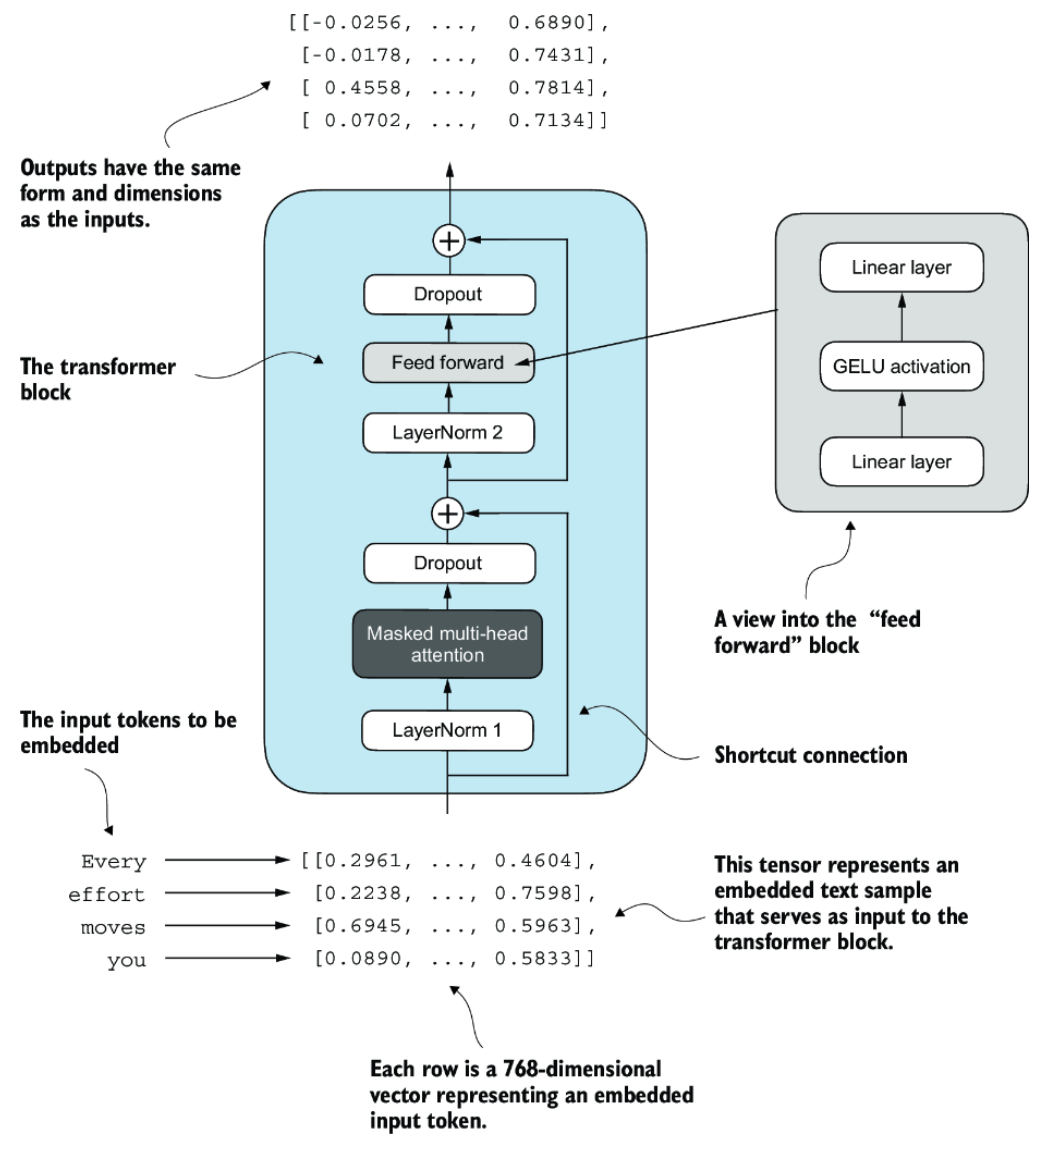

## The Main Transformer Block

In [179]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)  
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        attn_scores = queries @ keys.transpose(2, 3)
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values).transpose(1, 2)
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)
        return context_vec


        
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        #print(f"normalized tenspr:{norm_x}")
        #print(f"mean of the nomralized tensor:{norm_x.mean(dim=-1, keepdim=True)}")
        #print(f"var of the nomralized tensor:{norm_x.var(dim=-1,unbiased=False, keepdim=True)}")
        return self.scale * norm_x + self.shift
        
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)
        
class TransformerBlock(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.multiattn = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"], 
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg['emb_dim'])
        self.norm2 = LayerNorm(cfg['emb_dim'])
        self.drop_shortcut = nn.Dropout(cfg['drop_rate'])

    def forward(self,x):
        shortcut = x
        x = self.norm1(x)
        x = self.multiattn(x)
        x = self.drop_shortcut(x)
        x = x + shortcut

        shortcut = x
        x = self.norm1(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut

        return x
        
        

    

In [180]:

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"], 
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):

        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x + shortcut

        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut
        return x

##### Layer normalization (LayerNorm) is applied before each of these two components, and dropout is applied after them to regularize the model and prevent overfitting. This is also known as Pre-LayerNorm. Older architectures, such as the original transformer model, applied layer normalization after the self-attention and feed forward networks instead, known as Post-LayerNorm, which often leads to worse training dynamics.

##### In transformer-based models, **Layer Normalization** (LayerNorm) is used to stabilize and improve training by normalizing the input across the features of each layer. Applying LayerNorm before or after each sublayer (like self-attention or feedforward layers) impacts training stability and model performance.

Here’s a clear breakdown of why **Post-LayerNorm** (applying LayerNorm after the sublayers) leads to less effective training dynamics compared to **Pre-LayerNorm** (applying LayerNorm before the sublayers):

### 1. **Gradient Flow and Training Stability**

   - **Post-LayerNorm (After the Sublayers):** When LayerNorm is applied after the sublayers, gradients during backpropagation pass through the unnormalized self-attention and feedforward layers. These unnormalized layers can produce outputs with very high variance, which in turn can cause unstable gradients. This instability may lead to issues with exploding or vanishing gradients, especially in deep models, making the training less stable and slower.
   - **Pre-LayerNorm (Before the Sublayers):** Applying LayerNorm before each sublayer normalizes the input going into the sublayer, reducing variance. This makes the gradients more stable throughout the training, allowing for smoother learning dynamics and making it easier for the model to converge.

### 2. **Effective Depth and Signal Preservation**

   - **Post-LayerNorm:** In deeper networks, the accumulated variance from several sublayers without normalization at each step can cause the signal (i.e., information) from the input to degrade or "wash out" as it progresses through the layers. The normalization at the end of each layer does not adequately address the accumulation of variance within each layer, which can hinder the model’s ability to capture meaningful representations over many layers.
   - **Pre-LayerNorm:** By normalizing inputs before each sublayer, Pre-LayerNorm controls the variance within each layer, preventing signal degradation across layers. This helps the model effectively handle depth, maintaining a stronger, more informative signal throughout the network, which improves performance in deeper models.

### 3. **Gradient Clipping and Regularization Benefits**

   - **Post-LayerNorm:** Since the gradients are affected by unnormalized activations within the sublayers, it can be harder to regulate them effectively. This can sometimes require extra tricks, such as gradient clipping, to maintain stability.
   - **Pre-LayerNorm:** Normalizing the inputs before each sublayer provides a built-in form of regularization that effectively constrains the range of activations, making gradients easier to handle without additional interventions. This improves regularization and reduces overfitting.

### Summary

In essence, **Pre-LayerNorm** leads to better gradient stability, effective depth management, and natural regularization, contributing to smoother training and improved model performance. This is why newer transformer architectures often prefer Pre-LayerNorm over Post-LayerNorm.

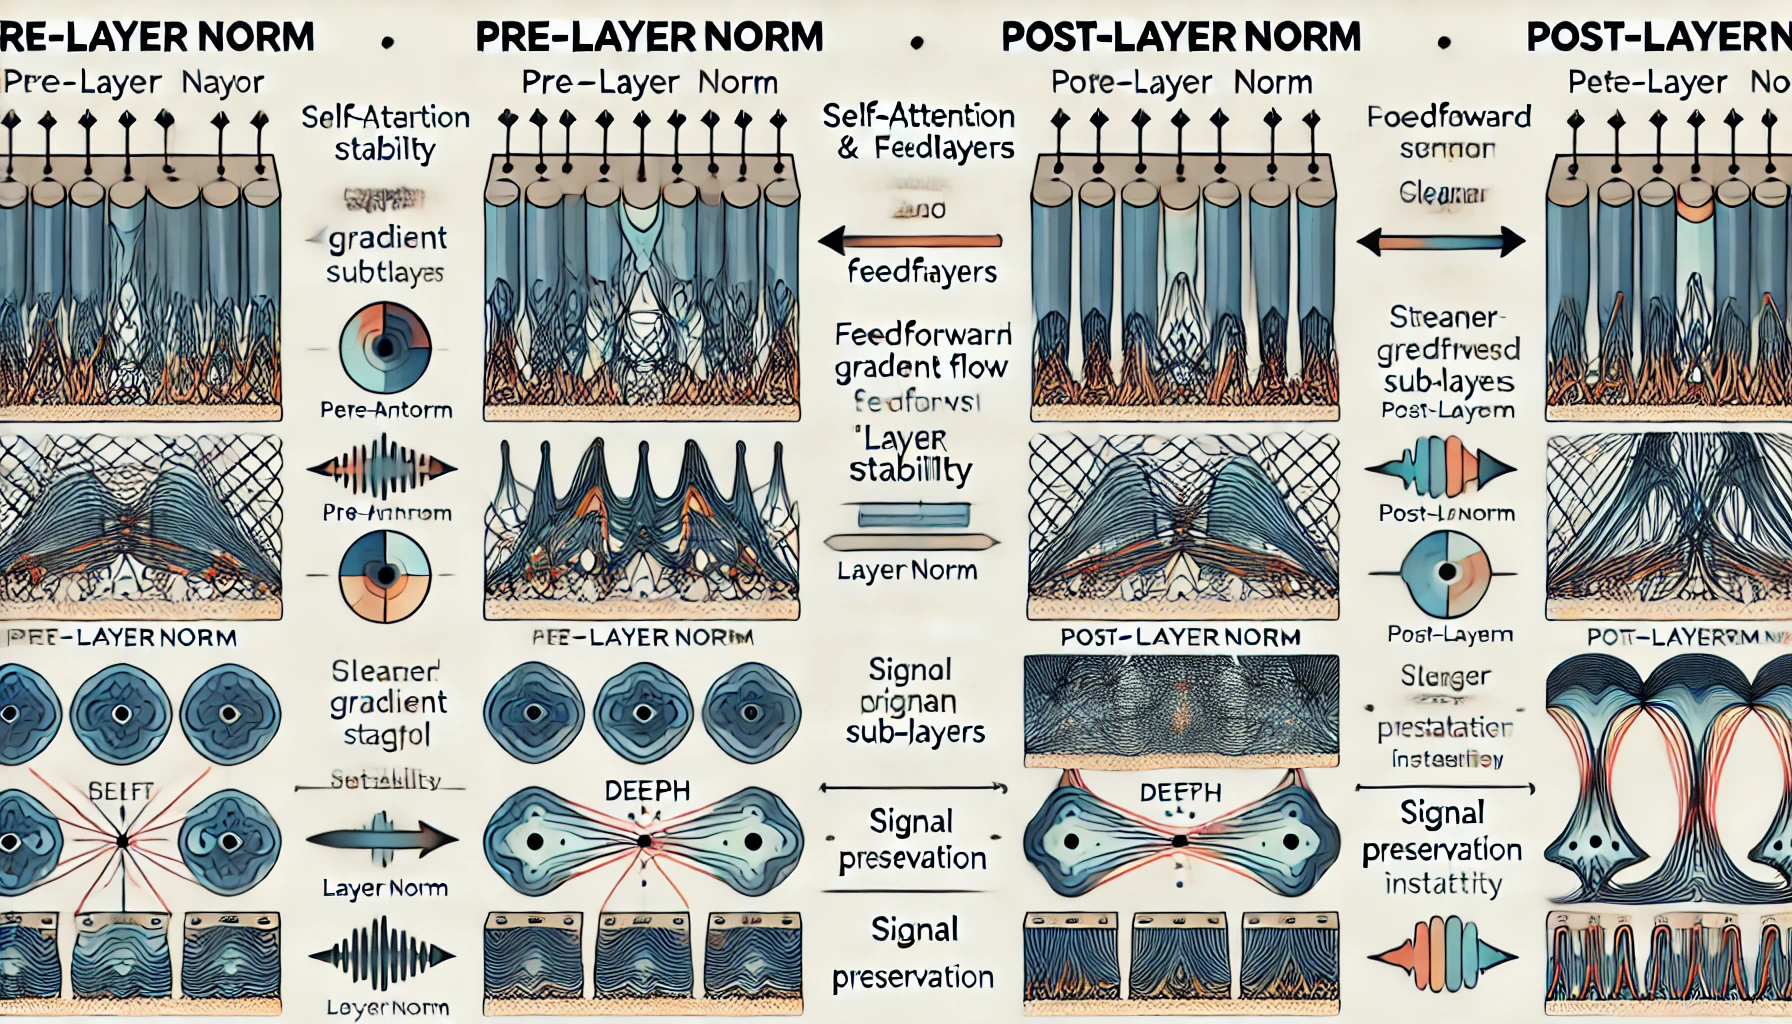

In [181]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768)
print(x)
print(f"config variables{GPT_CONFIG_124M}")
block = TransformerBlock(GPT_CONFIG_124M)

output = block(x)

print(f"Input:{x}")
print(f"Output:{output}")
print("Input shape:", x.shape)

print("Output shape:", output.shape)


tensor([[[0.2961, 0.5166, 0.2517,  ..., 0.9541, 0.8567, 0.4604],
         [0.2238, 0.3047, 0.3019,  ..., 0.5465, 0.4532, 0.7598],
         [0.6945, 0.2478, 0.4111,  ..., 0.8838, 0.4898, 0.5963],
         [0.0890, 0.7804, 0.9223,  ..., 0.4507, 0.6357, 0.5833]],

        [[0.5716, 0.9297, 0.3396,  ..., 0.0477, 0.4564, 0.2797],
         [0.0936, 0.2211, 0.3806,  ..., 0.3948, 0.4545, 0.4536],
         [0.6788, 0.1741, 0.2084,  ..., 0.5557, 0.5930, 0.0959],
         [0.3894, 0.4083, 0.0662,  ..., 0.9861, 0.9341, 0.1319]]])
config variables{'vocab_size': 50257, 'context_length': 1024, 'emb_dim': 768, 'n_heads': 12, 'n_layers': 12, 'drop_rate': 0.1, 'qkv_bias': False}
Input:tensor([[[0.2961, 0.5166, 0.2517,  ..., 0.9541, 0.8567, 0.4604],
         [0.2238, 0.3047, 0.3019,  ..., 0.5465, 0.4532, 0.7598],
         [0.6945, 0.2478, 0.4111,  ..., 0.8838, 0.4898, 0.5963],
         [0.0890, 0.7804, 0.9223,  ..., 0.4507, 0.6357, 0.5833]],

        [[0.5716, 0.9297, 0.3396,  ..., 0.0477, 0.4564, 0.2797

## 4.6 Coding the GPT model
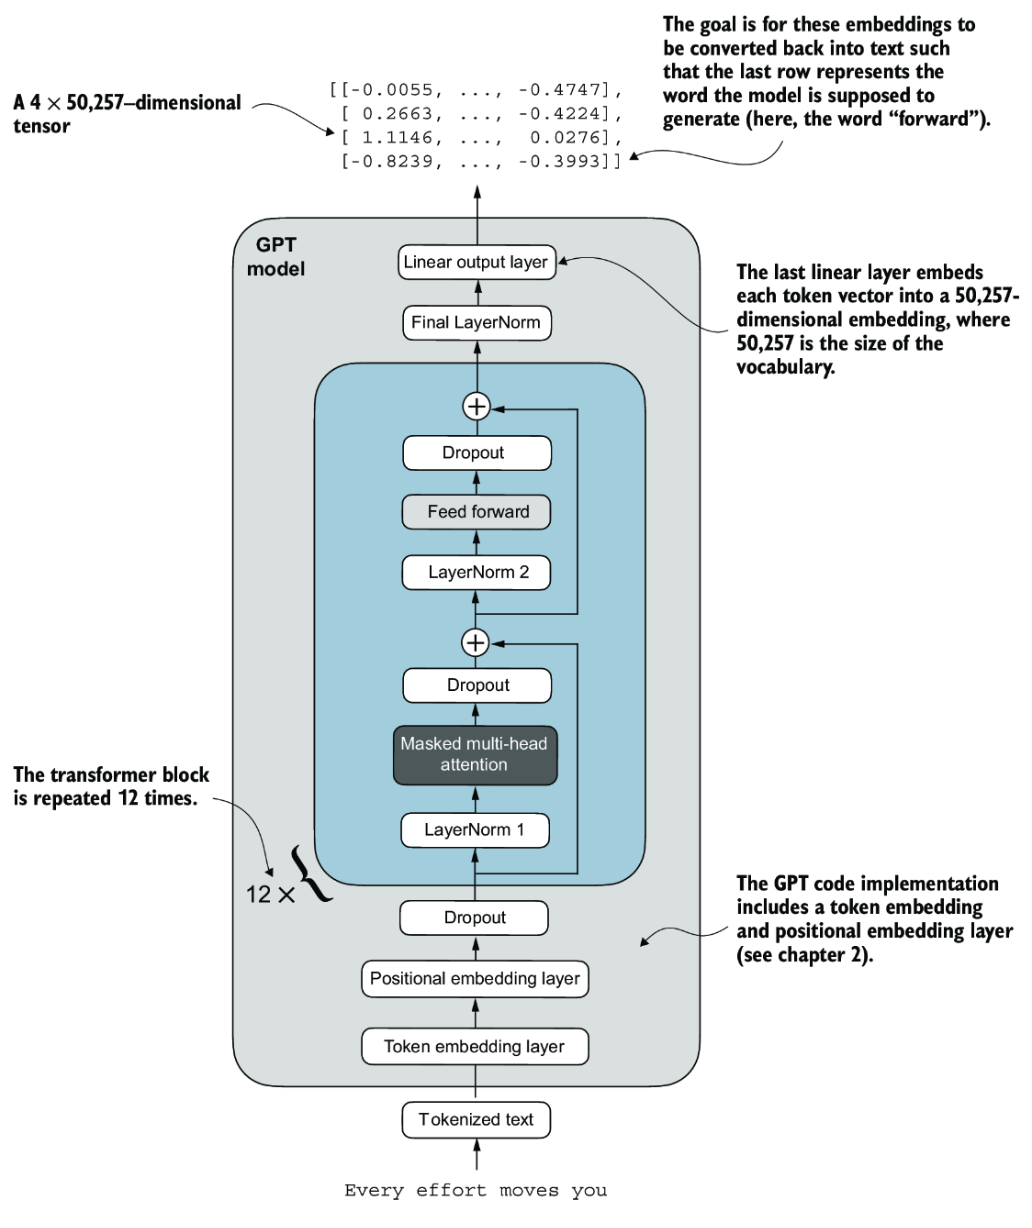


### Listing 4.7 The GPT model architecture implementation

In [182]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        #print(f"Input ids:{in_idx}")
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)

        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
 
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        #print(f"Token Embedding{tok_embeds}")
        #print(f"shape of the token embeddings:{tok_embeds.shape}")
        #print(f"Positional Embedding{pos_embeds}")
        #print(f"shape of the Positional embeddings:{pos_embeds.shape}")
        #print(f"Dropout Embedding{x}")
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


In [183]:
GPT_CONFIG_124M

{'vocab_size': 50257,
 'context_length': 1024,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'qkv_bias': False}

In [184]:
from ScratchLLM.gpt_model import GPTModel

config = {
    "vocab_size": 30522,
    "emb_dim": 768,
    "context_length": 512,
    "n_heads": 12,
    "drop_rate": 0.1,
    "n_layers": 12,
    "qkv_bias": True
}

model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.0939, -0.2257,  0.3101,  ..., -0.4865,  0.7681,  0.3117],
         [-0.6697, -0.2337,  0.0400,  ..., -0.0158, -0.0865,  1.7397],
         [-1.3821, -0.7332, -0.3937,  ...,  0.3729,  0.1190,  0.1642],
         [-0.1512,  0.2546,  0.3693,  ...,  0.8196,  0.6984, -0.4719]],

        [[-0.2477,  0.1082, -0.6077,  ...,  0.0646,  0.7117,  0.4195],
         [ 0.7072,  0.4718,  0.0270,  ...,  0.5623,  0.8918,  0.2949],
         [-0.5097, -0.1973, -0.7551,  ...,  0.4399, -0.0444, -0.0623],
         [-0.2141, -0.6951,  0.0989,  ...,  0.7375,  0.6525, -0.5369]]],
       grad_fn=<UnsafeViewBackward0>)


In [185]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M )

out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.3613,  0.4222, -0.0711,  ...,  0.3483,  0.4661, -0.2838],
         [-0.1792, -0.5660, -0.9485,  ...,  0.0477,  0.5181, -0.3168],
         [ 0.7120,  0.0332,  0.1085,  ...,  0.1018, -0.4327, -0.2553],
         [-1.0076,  0.3418, -0.1190,  ...,  0.7195,  0.4023,  0.0532]],

        [[-0.2564,  0.0900,  0.0335,  ...,  0.2659,  0.4454, -0.6806],
         [ 0.1230,  0.3653, -0.2074,  ...,  0.7705,  0.2710,  0.2246],
         [ 1.0558,  1.0318, -0.2800,  ...,  0.6936,  0.3205, -0.3178],
         [-0.1565,  0.3926,  0.3288,  ...,  1.2630, -0.1858,  0.0388]]],
       grad_fn=<UnsafeViewBackward0>)


In [186]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


In [187]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [188]:
total_params_gpt2 = (
    total_params - sum(p.numel()
    for p in model.out_head.parameters())
)
print(f"Number of trainable parameters "
      f"considering weight tying: {total_params_gpt2:,}"
)

Number of trainable parameters considering weight tying: 124,412,160


In [189]:
## Memory
total_size_bytes = total_params * 4
total_size_mb = total_size_bytes / (1024 * 1024)
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


## 4.7 Generating Text
## A function for the GPT model to generate text

In [196]:
def generate_text_simple(model, idx,max_new_tokens, context_size): 
    for _ in range(max_new_tokens):
        #print(idx[:,-1024:])
        idx_cond = idx[:, -context_size:]
        #print(idx_cond)
        with torch.no_grad():
            logits = model(idx_cond)

        logits = logits[:, -1, :]
        probas = torch.softmax(logits, dim=-1)
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)
        idx = torch.cat((idx, idx_next), dim=1)

    return idx

##### idx_cond = idx[:, -context_size:] extracts the last context_size tokens from idx and assigns it to idx_cond. This idx_cond is the model's input for the current generation step, limiting the context to avoid excessive input length.
##### In transformer models, using the entire context (all tokens generated so far) as input could be inefficient or infeasible for long sequences, hence context_size limits the number of tokens fed to the model at each step.

The softmax function is monotonic, meaning it preserves the order of its inputs when transformed into outputs. So, in practice, the softmax step is redundant since the position with the highest score in the softmax output tensor is the same position in the logit tensor. In other words, we could apply the torch.argmax function to the logits tensor directly and get identical results. However, I provide the code for the conversion to illustrate the full process of transforming logits to probabilities, which can add additional intuition so that the model generates the most likely next token, which is known as greedy decoding.

In [197]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0)
print("encoded",encoded_tensor,"encoded_tensor.shape:", encoded_tensor.shape)


encoded: [15496, 11, 314, 716]
encoded tensor([[15496,    11,   314,   716]]) encoded_tensor.shape: torch.Size([1, 4])


In [198]:
model.eval()
out = generate_text_simple(
    model=model,
    idx=encoded_tensor, 
    max_new_tokens=6, 
    context_size=GPT_CONFIG_124M["context_length"]
    
)
print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output length: 10


In [199]:
GPT_CONFIG_124M

{'vocab_size': 50257,
 'context_length': 1024,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'qkv_bias': False}

In [200]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue


## Utility functions for text to token ID conversion

In [201]:
import tiktoken

def generate_text_simple(model, idx,max_new_tokens, context_size): 
    for _ in range(max_new_tokens):
        #print(idx[:,-1024:])
        idx_cond = idx[:, -context_size:]
        #print(idx_cond)
        with torch.no_grad():
            logits = model(idx_cond)

        logits = logits[:, -1, :]
        probas = torch.softmax(logits, dim=-1)
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)
        idx = torch.cat((idx, idx_next), dim=1)

    return idx
    
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0)
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you Aeiman Byeswickattributeometer inspector Normandy freezerigrate


In [202]:
inputs = torch.tensor([[16833, 3626, 6100],   # ["every effort moves",
                       [40,    1107, 588]])   #  "I really like"]
targets = torch.tensor([[3626, 6100, 345  ],  # [" effort moves you",
                        [1107, 588, 11311]])  #  " really like chocolate"]
with torch.no_grad():
    logits = model(inputs)
probas = torch.softmax(logits, dim=-1)
print(probas.shape)

torch.Size([2, 3, 50257])


In [203]:
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[36397],
         [39619],
         [20610]],

        [[ 8615],
         [49289],
         [47105]]])


In [204]:
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1:"
      f" {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")

Targets batch 1:  effort moves you
Outputs batch 1:  Gathering SerbianFriday


## Calculating the training and validation set losses

In [207]:
## Loading a Small dataset contians 5k tokens
file_path = "subset_sentences.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))
print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 6512660
Tokens: 1465096


## Data Splitting

In [208]:
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

## Creating Data Loaders

In [209]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 256,  # Context length
    "emb_dim": 768,          # Embedding dimension
    "n_heads": 12,           # Number of attention heads
    "n_layers": 12,          # Number of layers
    "drop_rate": 0.1,        # Dropout rate
    "qkv_bias": False        # Query-Key-Value bias
}

## functions for creating Dataset and dataloaders 

In [210]:
import torch
from torch.utils.data import Dataset, DataLoader
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader_v1(txt, batch_size=4, max_length=256,stride=128, shuffle=True, drop_last=True,num_workers=0):
    
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [216]:

torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=32,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)
val_loader = create_dataloader_v1(
    val_data,
    batch_size=32,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [217]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:",val_loader)

for x, y in val_loader:
    print(x.shape, y.shape)

Train loader:
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 256]) torch.Size([32, 256])
torch.Size([32, 25

## calculate the cross entropy loss 

In [218]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)      
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(
        logits.flatten(0, 1), target_batch.flatten()
    )
    return loss

## Function to compute the training and validation loss


In [219]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )
            #print("loss",loss)
            #print("loss items",loss.item())
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [220]:
train_loader

In [221]:
len(train_loader)

161

In [167]:
import torch

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")


Using device: mps


In [222]:
device = torch.device("cpu" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

print("Using Device",device)
model.to(device)
with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)
print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Using device: cpu
Using Device cpu
Training loss: 10.997909421506135
Validation loss: 10.999734613630507


## The main function for pretraining LLMs

In [227]:
## CALCULATING THE LOSS FOR THE DATA LOADER
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

## CALCULATING LOSS FOR BATCH
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)      
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(
        logits.flatten(0, 1), target_batch.flatten()
    )
    return loss



## EVALUATING THE MODEL 
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(
            train_loader, model, device, num_batches=eval_iter
        )
        val_loss = calc_loss_loader(
            val_loader, model, device, num_batches=eval_iter
        )
    model.train()
    return train_loss, val_loss

# GENERAL FUNCTION TO PRINT THE SAMPLES AND ALSO TO GENERATE THE PRINT STATEMENTS OF THE LOSSES 
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=10, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))
    model.train()



import tiktoken

def generate_text_simple(model, idx,max_new_tokens, context_size): 
    for _ in range(max_new_tokens):
        #print(idx[:,-1024:])
        idx_cond = idx[:, -context_size:]
        #print(idx_cond)
        with torch.no_grad():
            logits = model(idx_cond)

        logits = logits[:, -1, :]
        probas = torch.softmax(logits, dim=-1)
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)
        idx = torch.cat((idx, idx_next), dim=1)

    return idx
    
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0)
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you, the, the the the the the the the


In [228]:
## TRAINING LOOP 
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,eval_freq, eval_iter, start_context, 
                       tokenizer):
    
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    for epoch in range(num_epochs):
        model.train()
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )
            loss.backward()
            optimizer.step()
            tokens_seen += input_batch.numel()
            print(f'Number of tokens seen :{tokens_seen}')
            global_step += 1

            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, "
                      f"Val loss {val_loss:.3f}"
                )
        
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )
    return train_losses, val_losses, track_tokens_seen

In [229]:
a = torch.randn(2,4,6)
print(torch.numel(a))
print(a)
a = torch.zeros(4,4)
print(torch.numel(a))

48
tensor([[[-2.4673, -1.4258, -1.1795, -0.2195,  0.0486,  0.2662],
         [ 0.9969, -1.1361, -0.0538,  0.7943,  0.2852, -0.9955],
         [-2.1348,  0.3844, -0.1802, -0.3396, -0.2530,  0.5075],
         [ 1.3125, -0.2932,  0.1642, -1.5256,  0.0664,  0.3896]],

        [[ 0.7673, -1.7922,  0.2447,  0.0759,  1.9067,  0.3246],
         [ 1.6929,  1.4059,  0.6453,  1.7467,  1.8322, -0.0188],
         [-0.7228,  0.2931, -0.7049,  0.5292,  0.0708,  0.2077],
         [ 1.3678, -1.1085, -1.7500, -1.3161, -2.1523,  1.0988]]])
16


In [231]:

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(
     model.parameters(),
    lr=0.001, weight_decay=0.1
)
num_epochs = 5
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=50,
    start_context="Hello, HOw are you?", tokenizer=tokenizer
)

Number of tokens seen :8192
Ep 1 (Step 000000): Train loss 9.529, Val loss 9.569
Number of tokens seen :16384
Number of tokens seen :24576
Number of tokens seen :32768
Number of tokens seen :40960
Number of tokens seen :49152
Number of tokens seen :57344
Number of tokens seen :65536
Number of tokens seen :73728
Number of tokens seen :81920
Number of tokens seen :90112
Number of tokens seen :98304
Number of tokens seen :106496
Number of tokens seen :114688
Number of tokens seen :122880
Number of tokens seen :131072
Number of tokens seen :139264
Number of tokens seen :147456
Number of tokens seen :155648
Number of tokens seen :163840
Number of tokens seen :172032
Number of tokens seen :180224
Number of tokens seen :188416
Number of tokens seen :196608
Number of tokens seen :204800
Number of tokens seen :212992
Number of tokens seen :221184
Number of tokens seen :229376
Number of tokens seen :237568
Number of tokens seen :245760
Number of tokens seen :253952
Number of tokens seen :262144


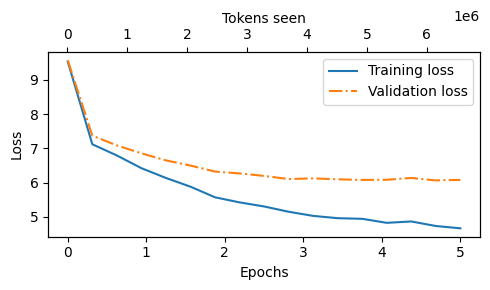

In [232]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(
        epochs_seen, val_losses, linestyle="-.", label="Validation loss"
    )
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2 = ax1.twiny()
    ax2.plot(tokens_seen, train_losses, alpha=0)
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

## Decoding strategies to control randomness


### INFERENCE TIME 

```python
def generate_text_simple(model, idx, max_new_tokens, context_size): 
    for _ in range(max_new_tokens):
        #print(idx[:,-1024:])
        idx_cond = idx[:, -context_size:]
        #print(idx_cond)
        with torch.no_grad():
            logits = model(idx_cond)

        logits = logits[:, -1, :]
        probas = torch.softmax(logits, dim=-1)
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)
        idx = torch.cat((idx, idx_next), dim=1)

    return idx



In [280]:
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids("You enter words and phrases ", tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 You enter words and phrases !!!
The hotel is a quiet location and the perfect location and the city of the hotel is a few steps from the most


## TEMPERATURE SCALING

In [236]:
vocab = { 
    "closer": 0,
    "every": 1, 
    "effort": 2, 
    "forward": 3,
    "inches": 4,
    "moves": 5, 
    "pizza": 6,
    "toward": 7,
    "you": 8,
} 
inverse_vocab = {v: k for k, v in vocab.items()}


In [237]:
next_token_logits = torch.tensor(
    [4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

In [238]:
probas = torch.softmax(next_token_logits, dim=0)
next_token_id = torch.argmax(probas).item()
print(inverse_vocab[next_token_id],next_token_id)

forward 3


In [239]:
torch.manual_seed(123) 
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])

forward


In [240]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)
    sample = [torch.multinomial(probas, num_samples=1).item()
             for i in range(1_000)]
    sampled_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")

print_sampled_tokens(probas)

73 x closer
0 x every
0 x effort
582 x forward
2 x inches
0 x moves
0 x pizza
343 x toward


In [241]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

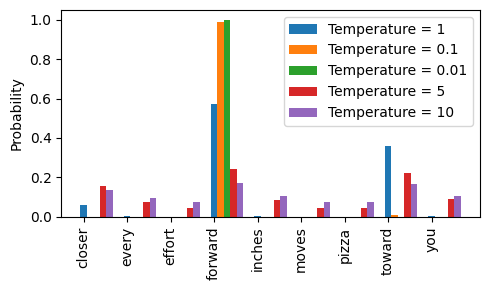

In [242]:
temperatures = [1, 0.1,0.01, 5,10]
scaled_probas = [softmax_with_temperature(next_token_logits, T)
                for T in temperatures]
x = torch.arange(len(vocab))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], 
                   bar_width, label=f'Temperature = {T}')
ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

## TOP - K Sampling

In [243]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, top_k)
print("Top logits:", top_logits)
print("Top positions:", top_pos)

Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


## Updated Text Generationg function 

In [244]:
def generate(model, idx, max_new_tokens, context_size,temperature=0.0, top_k=None, eos_id=None):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]
        if top_k is not None:
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(
                logits < min_val,
                torch.tensor(float('-inf')).to(logits.device),
                logits
            )
        if temperature > 0.0:
            logits = logits / temperature
            probs = torch.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)
        if idx_next == eos_id:
            break
        idx = torch.cat((idx, idx_next), dim=1)
    return idx

### INFERENCE TIME 

```python
def generate_text_simple(model, idx, max_new_tokens, context_size): 
    for _ in range(max_new_tokens):
        #print(idx[:,-1024:])
        idx_cond = idx[:, -context_size:]
        #print(idx_cond)
        with torch.no_grad():
            logits = model(idx_cond)

        logits = logits[:, -1, :]
        probas = torch.softmax(logits, dim=-1)
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)
        idx = torch.cat((idx, idx_next), dim=1)

    return idx



## SAVING MODEL 

In [245]:
torch.save(model.state_dict(), "model.pth")

In [247]:
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("model.pth", map_location=device))
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (multiattn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (multiattn): MultiHeadAttention(
        (W_query): Linear

In [248]:
torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    }, 
    "model_and_optimizer.pth"
)

In [249]:
checkpoint = torch.load("model_and_optimizer.pth", map_location=device)
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train();

In [174]:
## TRAINING LOOP 
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,eval_freq, eval_iter, start_context, 
                       tokenizer):
    
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    for epoch in range(num_epochs):
        model.train()
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )
            loss.backward()
            optimizer.step()
            tokens_seen += input_batch.numel()
            print(f'Number of tokens seen :{tokens_seen}')
            global_step += 1

            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, "
                      f"Val loss {val_loss:.3f}"
                )

        generate_and_print_sample(
            model, tokenizer, device, start_context
        )
    return train_losses, val_losses, track_tokens_seen
    


In [175]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(
     model.parameters(),
    lr=0.001, weight_decay=0.1
)
num_epochs = 100
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)

Number of tokens seen :512
Ep 1 (Step 000000): Train loss 9.509, Val loss 9.665
Number of tokens seen :1024
Number of tokens seen :1536
Number of tokens seen :2048
Number of tokens seen :2560
Number of tokens seen :3072
Ep 1 (Step 000005): Train loss 6.989, Val loss 7.235
Number of tokens seen :3584
Number of tokens seen :4096
Number of tokens seen :4608
Every effort moves you,,,,,,,,,,
Number of tokens seen :5120
Number of tokens seen :5632
Ep 2 (Step 000010): Train loss 6.155, Val loss 6.697
Number of tokens seen :6144
Number of tokens seen :6656
Number of tokens seen :7168
Number of tokens seen :7680
Number of tokens seen :8192
Ep 2 (Step 000015): Train loss 5.938, Val loss 6.733
Number of tokens seen :8704
Number of tokens seen :9216
Every effort moves you,,,,,,,,,,
Number of tokens seen :9728
Number of tokens seen :10240
Number of tokens seen :10752
Ep 3 (Step 000020): Train loss 5.769, Val loss 6.674
Number of tokens seen :11264
Number of tokens seen :11776
Number of tokens seen 

In [ ]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, top_k)
print("Top logits:", top_logits)
print("Top positions:", top_pos)

### Downloading & Loading pretrained weights from OpenAI

In [250]:
import urllib.request
url = (
    "https://raw.githubusercontent.com/rasbt/"
    "LLMs-from-scratch/main/ch05/"
    "01_main-chapter-code/gpt_download.py"
)
filename = url.split('/')[-1]
urllib.request.urlretrieve(url, filename)

('gpt_download.py', <http.client.HTTPMessage at 0x316b88130>)

In [251]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [252]:
from gpt_download import download_and_load_gpt2
settings, params = download_and_load_gpt2(
    model_size="124M", models_dir="gpt2"
)

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


In [253]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())

Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [254]:
GPT_CONFIG_124M

{'vocab_size': 50257,
 'context_length': 256,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'qkv_bias': False}

In [255]:
print(params["wte"])
print("Token embedding weight tensor dimensions:", params["wte"].shape)

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
Token embedding weight tensor dimensions: (50257, 768)


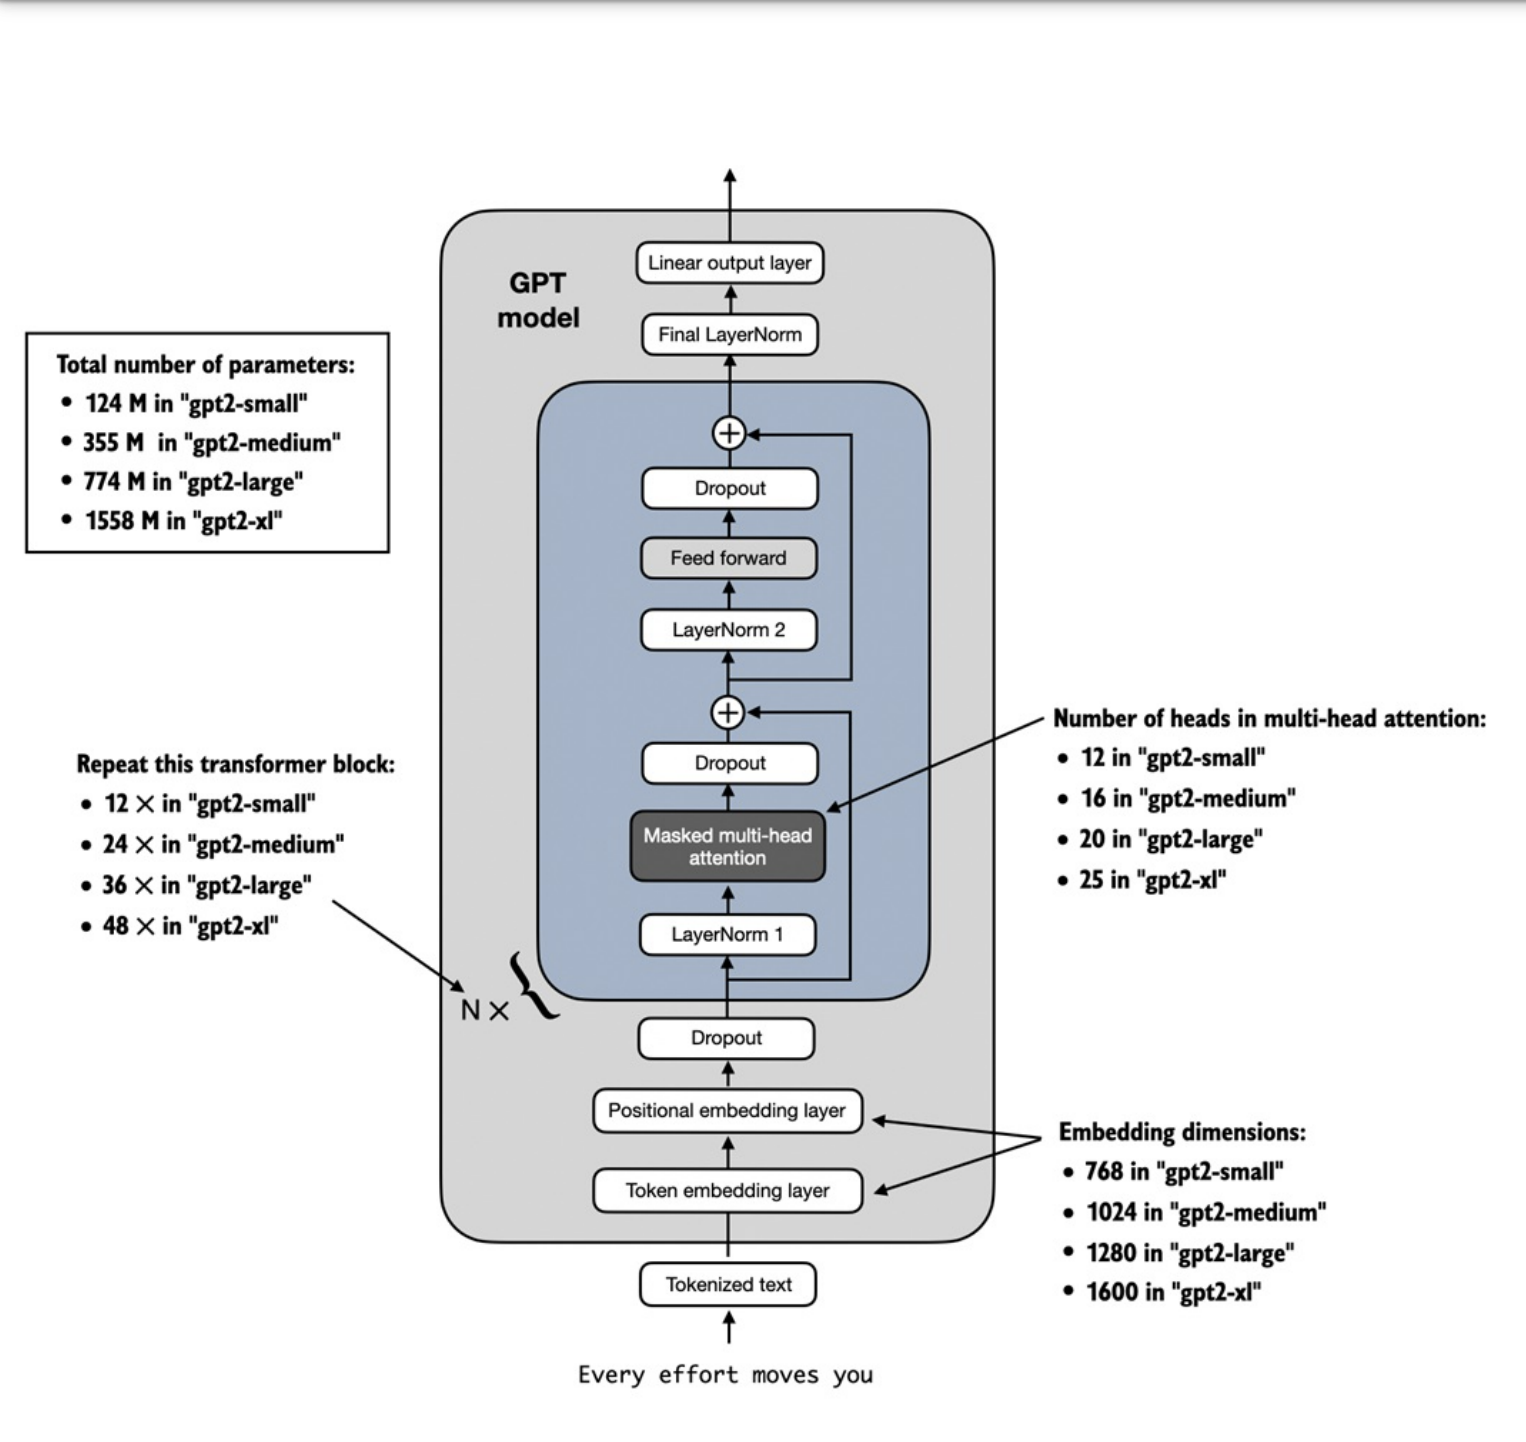

In [256]:
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

In [257]:
model_name = "gpt2-small (124M)"
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])

In [258]:
NEW_CONFIG.update({"context_length": 1024})
NEW_CONFIG.update({"qkv_bias": True})

In [259]:
gpt = GPTModel(NEW_CONFIG)
gpt.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (multiattn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (multiattn): MultiHeadAttention(
        (W_query): Linear(i

In [260]:
def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, "
                          "Right: {right.shape}"
        )
    return torch.nn.Parameter(torch.tensor(right))

In [263]:
import numpy as np

def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])

    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].multiattn.W_query.weight = assign(
            gpt.trf_blocks[b].multiattn.W_query.weight, q_w.T)
        gpt.trf_blocks[b].multiattn.W_key.weight = assign(
            gpt.trf_blocks[b].multiattn.W_key.weight, k_w.T)
        gpt.trf_blocks[b].multiattn.W_value.weight = assign(
            gpt.trf_blocks[b].multiattn.W_value.weight, v_w.T)

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].multiattn.W_query.bias = assign(
            gpt.trf_blocks[b].multiattn.W_query.bias, q_b)
        gpt.trf_blocks[b].multiattn.W_key.bias = assign(
            gpt.trf_blocks[b].multiattn.W_key.bias, k_b)
        gpt.trf_blocks[b].multiattn.W_value.bias = assign(
            gpt.trf_blocks[b].multiattn.W_value.bias, v_b)

        gpt.trf_blocks[b].multiattn.out_proj.weight = assign(
            gpt.trf_blocks[b].multiattn.out_proj.weight, 
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].multiattn.out_proj.bias = assign(
            gpt.trf_blocks[b].multiattn.out_proj.bias, 
            params["blocks"][b]["attn"]["c_proj"]["b"])

        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight, 
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias, 
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight, 
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias, 
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale, 
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift, 
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale, 
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift, 
            params["blocks"][b]["ln_2"]["b"])

    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])

In [264]:
load_weights_into_gpt(gpt, params)
gpt.to(device)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (multiattn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (multiattn): MultiHeadAttention(
        (W_query): Linear(i

In [281]:
torch.manual_seed(123)
token_ids = generate(
    model=gpt,
    idx=text_to_token_ids("This software is written in  ", tokenizer).to(device),
    max_new_tokens=25,
    context_size=NEW_CONFIG["context_length"],
    temperature = 0.8
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 This software is written in   not rendering GroundTemp.Tweet laterbanks rot Space redu orition May
 at severeluence y, twovy It34 stuck
